#Using gdown to access our data

In [1]:
!gdown 1MgN5RbogMOlxJ9k7WSvrGRwmiRjrOF7M

Downloading...
From: https://drive.google.com/uc?id=1MgN5RbogMOlxJ9k7WSvrGRwmiRjrOF7M
To: /content/analytic_data2022.csv
100% 12.8M/12.8M [00:00<00:00, 188MB/s]


# Importing required libraries and packages

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
df = pd.read_csv('/content/analytic_data2022.csv')
df.info()
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Columns: 725 entries, State FIPS Code to % rural CI high
dtypes: object(725)
memory usage: 17.7+ MB


,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,% female raw value,% female numerator,% female denominator,% female CI low,% female CI high,% rural raw value,% rural numerator,% rural denominator,% rural CI low,% rural CI high
0,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v057_rawvalue,v057_numerator,v057_denominator,v057_cilow,v057_cihigh,v058_rawvalue,v058_numerator,v058_denominator,v058_cilow,v058_cihigh
1,00,000,00000,US,United States,2022,NaN,7281.9355638,4125218,917267406,...,0.5075447019,167227921,329484123,NaN,NaN,0.1926902892,NaN,NaN,NaN,NaN
2,01,000,01000,AL,Alabama,2022,NaN,10350.071456,88086,13668498,...,0.5170272184,2544566,4921532,NaN,NaN,0.409631829,1957932,4779736,NaN,NaN
3,01,001,01001,AL,Autauga County,2022,1,8027.3947267,836,156081,...,0.5150770327,28919,56145,NaN,NaN,0.4200216232,22921,54571,NaN,NaN
4,01,003,01003,AL,Baldwin County,2022,1,8118.3582061,3377,614143,...,0.5158905651,118287,229287,NaN,NaN,0.4227909911,77060,182265,NaN,NaN


#Data Cleaning

In [4]:
#Removing columns that contain numerator, denominator, confidence intervals, and other features associated with 
#specific measure IDs to base our analysis on the raw values
remove = df.columns[df.columns.str.contains(pat = 'numerator|denominator|cilow|cihigh|flag|CI high|CI low|AIAN|Asian|Hispanic|Black|White|Native|wage')]
data = df[[i for i in df.columns if i not in remove]]

In [5]:
#the variable mapping is created in order to store the column reference
l1 = list(data.iloc[0])
l2 = list(data.columns)
variable_mapping = {l1[i]:l2[i] for i in range (len(l1))}
data.columns=data.iloc[0]
data = data[1:]

In [6]:
#converting metrics from object type to numeric
numeric = list(data.columns[data.columns.str.contains(pat = '^v')])
numeric.append('county_ranked')
data[numeric] = data[numeric].apply(pd.to_numeric)

In [7]:
data

,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v002_rawvalue,v036_rawvalue,...,v156_rawvalue,v153_rawvalue,v154_rawvalue,v166_rawvalue,v051_rawvalue,v052_rawvalue,v053_rawvalue,v059_rawvalue,v057_rawvalue,v058_rawvalue
1,00,000,00000,US,United States,2022,NaN,7281.935564,0.171052,3.907359,...,394.719953,0.644043,0.141902,0.852466,329484123,0.221019,0.168929,0.041597,0.507545,0.192690
2,01,000,01000,AL,Alabama,2022,NaN,10350.071456,0.214102,4.814633,...,219.909377,0.691820,0.118997,0.799154,4921532,0.220924,0.177637,0.010194,0.517027,0.409632
3,01,001,01001,AL,Autauga County,2022,1.0,8027.394727,0.201000,4.510042,...,155.095523,0.746231,0.138328,0.827079,56145,0.231846,0.161760,0.006927,0.515077,0.420022
4,01,003,01003,AL,Baldwin County,2022,1.0,8118.358206,0.172000,4.168866,...,133.604842,0.769998,0.114508,0.850691,229287,0.211285,0.215821,0.007721,0.515891,0.422791
5,01,005,01005,AL,Barbour County,2022,1.0,12876.760319,0.311000,5.884415,...,102.459673,0.619502,0.123855,0.646321,24589,0.204726,0.202611,0.018275,0.471837,0.677896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56,37,56037,WY,Sweetwater County,2022,1.0,8419.275418,0.163000,3.495993,...,219.225336,0.753656,0.086837,0.866527,42673,0.254095,0.137417,0.007929,0.483608,0.109163
3191,56,39,56039,WY,Teton County,2022,1.0,3283.066198,0.116000,2.779692,...,143.645796,0.559390,0.115926,0.890795,23497,0.177086,0.165979,0.029942,0.481338,0.464309
3192,56,41,56041,WY,Uinta County,2022,1.0,9358.208153,0.172000,3.792121,...,127.616901,0.769804,0.055942,0.914495,20215,0.277418,0.156567,0.012533,0.493940,0.430959
3193,56,43,56043,WY,Washakie County,2022,1.0,7073.941804,0.173000,3.660729,...,76.937070,0.730288,0.057975,0.827757,7760,0.219845,0.232861,0.002136,0.490464,0.359545


#Taking into account only county level rows into account since our analysis will be based on county level

In [8]:
#filtering out rows which belong to country or state level to make sure we have uniformity in the data as the remaining 
#data is county level 
data = data[data['county_ranked']==1]
data

,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v002_rawvalue,v036_rawvalue,...,v156_rawvalue,v153_rawvalue,v154_rawvalue,v166_rawvalue,v051_rawvalue,v052_rawvalue,v053_rawvalue,v059_rawvalue,v057_rawvalue,v058_rawvalue
3,01,001,01001,AL,Autauga County,2022,1.0,8027.394727,0.201,4.510042,...,155.095523,0.746231,0.138328,0.827079,56145,0.231846,0.161760,0.006927,0.515077,0.420022
4,01,003,01003,AL,Baldwin County,2022,1.0,8118.358206,0.172,4.168866,...,133.604842,0.769998,0.114508,0.850691,229287,0.211285,0.215821,0.007721,0.515891,0.422791
5,01,005,01005,AL,Barbour County,2022,1.0,12876.760319,0.311,5.884415,...,102.459673,0.619502,0.123855,0.646321,24589,0.204726,0.202611,0.018275,0.471837,0.677896
6,01,007,01007,AL,Bibb County,2022,1.0,11191.474323,0.250,5.161337,...,26.588748,0.747761,0.093931,0.761262,22136,0.199946,0.170763,0.003551,0.468151,0.683526
7,01,009,01009,AL,Blount County,2022,1.0,10787.014541,0.232,4.948393,...,43.309562,0.760764,0.087759,0.796227,57879,0.228027,0.190034,0.014765,0.505572,0.899515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56,37,56037,WY,Sweetwater County,2022,1.0,8419.275418,0.163,3.495993,...,219.225336,0.753656,0.086837,0.866527,42673,0.254095,0.137417,0.007929,0.483608,0.109163
3191,56,39,56039,WY,Teton County,2022,1.0,3283.066198,0.116,2.779692,...,143.645796,0.559390,0.115926,0.890795,23497,0.177086,0.165979,0.029942,0.481338,0.464309
3192,56,41,56041,WY,Uinta County,2022,1.0,9358.208153,0.172,3.792121,...,127.616901,0.769804,0.055942,0.914495,20215,0.277418,0.156567,0.012533,0.493940,0.430959
3193,56,43,56043,WY,Washakie County,2022,1.0,7073.941804,0.173,3.660729,...,76.937070,0.730288,0.057975,0.827757,7760,0.219845,0.232861,0.002136,0.490464,0.359545


# Checking for missing values

In [9]:
#checking for Nan values throughout the columns
pd.set_option('display.max_rows', 500)
data.isnull().sum().sort_values(ascending=False)

0
v129_rawvalue        1865
v149_rawvalue        1861
v015_rawvalue        1756
v138_rawvalue        1285
v128_rawvalue        1198
v158_rawvalue        1149
v148_rawvalue         811
v161_rawvalue         649
v161_other_data_1     649
v158_other_data_2     620
v158_other_data_1     620
v021_rawvalue         600
v173_rawvalue         518
v061_rawvalue         439
v160_rawvalue         395
v039_rawvalue         391
v159_rawvalue         307
v142_rawvalue         232
v167_rawvalue         192
v062_rawvalue         189
v062_other_data_1     189
v043_rawvalue         174
v004_rawvalue         151
v004_other_data_1     151
v172_rawvalue         131
v014_rawvalue         129
v088_other_data_1      90
v088_rawvalue          90
v045_rawvalue          81
v132_rawvalue          60
v169_rawvalue          59
v065_rawvalue          50
v037_rawvalue          49
v135_rawvalue          49
v124_rawvalue          42
v083_rawvalue          32
v133_rawvalue          32
v005_rawvalue          25
v125_rawva

In [10]:
data.shape

(3082, 96)

In [11]:
#counting the number of Nan values in each column
na_counts = data.isnull().sum()

In [12]:
#if 33 % of the data is missing in a particular column, we drop the column
data = data[[c for c in data.columns if c not in na_counts[na_counts>=1000].index]]

In [13]:
data

,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v002_rawvalue,v036_rawvalue,...,v156_rawvalue,v153_rawvalue,v154_rawvalue,v166_rawvalue,v051_rawvalue,v052_rawvalue,v053_rawvalue,v059_rawvalue,v057_rawvalue,v058_rawvalue
3,01,001,01001,AL,Autauga County,2022,1.0,8027.394727,0.201,4.510042,...,155.095523,0.746231,0.138328,0.827079,56145,0.231846,0.161760,0.006927,0.515077,0.420022
4,01,003,01003,AL,Baldwin County,2022,1.0,8118.358206,0.172,4.168866,...,133.604842,0.769998,0.114508,0.850691,229287,0.211285,0.215821,0.007721,0.515891,0.422791
5,01,005,01005,AL,Barbour County,2022,1.0,12876.760319,0.311,5.884415,...,102.459673,0.619502,0.123855,0.646321,24589,0.204726,0.202611,0.018275,0.471837,0.677896
6,01,007,01007,AL,Bibb County,2022,1.0,11191.474323,0.250,5.161337,...,26.588748,0.747761,0.093931,0.761262,22136,0.199946,0.170763,0.003551,0.468151,0.683526
7,01,009,01009,AL,Blount County,2022,1.0,10787.014541,0.232,4.948393,...,43.309562,0.760764,0.087759,0.796227,57879,0.228027,0.190034,0.014765,0.505572,0.899515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56,37,56037,WY,Sweetwater County,2022,1.0,8419.275418,0.163,3.495993,...,219.225336,0.753656,0.086837,0.866527,42673,0.254095,0.137417,0.007929,0.483608,0.109163
3191,56,39,56039,WY,Teton County,2022,1.0,3283.066198,0.116,2.779692,...,143.645796,0.559390,0.115926,0.890795,23497,0.177086,0.165979,0.029942,0.481338,0.464309
3192,56,41,56041,WY,Uinta County,2022,1.0,9358.208153,0.172,3.792121,...,127.616901,0.769804,0.055942,0.914495,20215,0.277418,0.156567,0.012533,0.493940,0.430959
3193,56,43,56043,WY,Washakie County,2022,1.0,7073.941804,0.173,3.660729,...,76.937070,0.730288,0.057975,0.827757,7760,0.219845,0.232861,0.002136,0.490464,0.359545


In [14]:
#current columns with number of missing values
data.isnull().sum().sort_values(ascending=False)

0
v148_rawvalue        811
v161_rawvalue        649
v161_other_data_1    649
v158_other_data_2    620
v158_other_data_1    620
v021_rawvalue        600
v173_rawvalue        518
v061_rawvalue        439
v160_rawvalue        395
v039_rawvalue        391
v159_rawvalue        307
v142_rawvalue        232
v167_rawvalue        192
v062_rawvalue        189
v062_other_data_1    189
v043_rawvalue        174
v004_rawvalue        151
v004_other_data_1    151
v172_rawvalue        131
v014_rawvalue        129
v088_rawvalue         90
v088_other_data_1     90
v045_rawvalue         81
v132_rawvalue         60
v169_rawvalue         59
v065_rawvalue         50
v135_rawvalue         49
v037_rawvalue         49
v124_rawvalue         42
v133_rawvalue         32
v083_rawvalue         32
v005_rawvalue         25
v125_rawvalue         21
v134_rawvalue         18
v147_rawvalue         17
v131_other_data_1     14
v131_rawvalue         14
v050_rawvalue         13
v155_rawvalue         12
v058_rawvalue          

In [15]:
#filtering the columns where absolute value of correlation with the target variable is greater than 0.1
#as that is almost no correlation and would not contribute to preventable hospitalization
data_corr = data.corr()
data_corr_filtered = data_corr[abs(data_corr['v005_rawvalue'])>0.1]
col_names = list(data_corr_filtered['v005_rawvalue'].to_frame().index)

data = data[[	'statecode',	'countycode',	'fipscode',	'state',	'county',	'year',	'county_ranked'  ]+ col_names]

In [16]:
data.isnull().sum().sort_values(ascending=False)

0
v148_rawvalue        811
v173_rawvalue        518
v061_rawvalue        439
v160_rawvalue        395
v039_rawvalue        391
v159_rawvalue        307
v062_rawvalue        189
v062_other_data_1    189
v043_rawvalue        174
v004_other_data_1    151
v004_rawvalue        151
v014_rawvalue        129
v088_rawvalue         90
v088_other_data_1     90
v045_rawvalue         81
v132_rawvalue         60
v169_rawvalue         59
v065_rawvalue         50
v037_rawvalue         49
v135_rawvalue         49
v133_rawvalue         32
v005_rawvalue         25
v125_rawvalue         21
v147_rawvalue         17
v050_rawvalue         13
v155_rawvalue         12
v058_rawvalue          6
v044_rawvalue          5
v063_rawvalue          1
v171_rawvalue          1
v053_rawvalue          0
v137_rawvalue          0
v139_rawvalue          0
v060_rawvalue          0
v145_rawvalue          0
v144_rawvalue          0
v127_rawvalue          0
v143_rawvalue          0
v003_rawvalue          0
v166_rawvalue          

In [17]:
#looking at missing values in rows
data.isnull().sum(axis=1)[data.isnull().sum(axis=1)>5].count()

235

In [18]:
#taking 5 as threshold for filtering out rows with more than 5 missing values
data = data[data.isnull().sum(axis=1)<5]
data

,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v002_rawvalue,v036_rawvalue,...,v159_rawvalue,v160_rawvalue,v169_rawvalue,v063_rawvalue,v065_rawvalue,v171_rawvalue,v148_rawvalue,v166_rawvalue,v053_rawvalue,v058_rawvalue
3,01,001,01001,AL,Autauga County,2022,1.0,8027.394727,0.201,4.510042,...,3.126968,2.917280,-2618.608000,67565.0,0.454825,0.175268,17.592044,0.827079,0.161760,0.420022
4,01,003,01003,AL,Baldwin County,2022,1.0,8118.358206,0.172,4.168866,...,3.192381,3.037912,333.942400,71135.0,0.461323,0.171167,14.014403,0.850691,0.215821,0.422791
5,01,005,01005,AL,Barbour County,2022,1.0,12876.760319,0.311,5.884415,...,2.389161,2.008629,-15097.365000,38866.0,0.602062,0.243169,25.520173,0.646321,0.202611,0.677896
6,01,007,01007,AL,Bibb County,2022,1.0,11191.474323,0.250,5.161337,...,2.688775,2.563367,-4279.571000,50907.0,0.591428,0.214057,17.818801,0.761262,0.170763,0.683526
7,01,009,01009,AL,Blount County,2022,1.0,10787.014541,0.232,4.948393,...,2.901714,2.781497,-574.207000,55203.0,0.524013,0.218557,20.396734,0.796227,0.190034,0.899515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56,37,56037,WY,Sweetwater County,2022,1.0,8419.275418,0.163,3.495993,...,3.253744,3.416824,8355.925500,70583.0,0.341530,0.266056,25.027113,0.866527,0.137417,0.109163
3191,56,39,56039,WY,Teton County,2022,1.0,3283.066198,0.116,2.779692,...,3.538906,3.606338,12020.380000,92488.0,0.174277,0.203043,9.442222,0.890795,0.165979,0.464309
3192,56,41,56041,WY,Uinta County,2022,1.0,9358.208153,0.172,3.792121,...,3.143786,3.346237,9644.015333,71246.0,0.272685,0.222483,22.547251,0.914495,0.156567,0.430959
3193,56,43,56043,WY,Washakie County,2022,1.0,7073.941804,0.173,3.660729,...,3.658461,3.750633,13269.548500,58532.0,0.408193,0.320833,NaN,0.827757,0.232861,0.359545


In [19]:
#we do not want to impute the our target variable, therefore dropping rows where the target variable is null
data = data[data['v005_rawvalue'].isnull()==False]
data

,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v002_rawvalue,v036_rawvalue,...,v159_rawvalue,v160_rawvalue,v169_rawvalue,v063_rawvalue,v065_rawvalue,v171_rawvalue,v148_rawvalue,v166_rawvalue,v053_rawvalue,v058_rawvalue
3,01,001,01001,AL,Autauga County,2022,1.0,8027.394727,0.201,4.510042,...,3.126968,2.917280,-2618.608000,67565.0,0.454825,0.175268,17.592044,0.827079,0.161760,0.420022
4,01,003,01003,AL,Baldwin County,2022,1.0,8118.358206,0.172,4.168866,...,3.192381,3.037912,333.942400,71135.0,0.461323,0.171167,14.014403,0.850691,0.215821,0.422791
5,01,005,01005,AL,Barbour County,2022,1.0,12876.760319,0.311,5.884415,...,2.389161,2.008629,-15097.365000,38866.0,0.602062,0.243169,25.520173,0.646321,0.202611,0.677896
6,01,007,01007,AL,Bibb County,2022,1.0,11191.474323,0.250,5.161337,...,2.688775,2.563367,-4279.571000,50907.0,0.591428,0.214057,17.818801,0.761262,0.170763,0.683526
7,01,009,01009,AL,Blount County,2022,1.0,10787.014541,0.232,4.948393,...,2.901714,2.781497,-574.207000,55203.0,0.524013,0.218557,20.396734,0.796227,0.190034,0.899515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56,37,56037,WY,Sweetwater County,2022,1.0,8419.275418,0.163,3.495993,...,3.253744,3.416824,8355.925500,70583.0,0.341530,0.266056,25.027113,0.866527,0.137417,0.109163
3191,56,39,56039,WY,Teton County,2022,1.0,3283.066198,0.116,2.779692,...,3.538906,3.606338,12020.380000,92488.0,0.174277,0.203043,9.442222,0.890795,0.165979,0.464309
3192,56,41,56041,WY,Uinta County,2022,1.0,9358.208153,0.172,3.792121,...,3.143786,3.346237,9644.015333,71246.0,0.272685,0.222483,22.547251,0.914495,0.156567,0.430959
3193,56,43,56043,WY,Washakie County,2022,1.0,7073.941804,0.173,3.660729,...,3.658461,3.750633,13269.548500,58532.0,0.408193,0.320833,NaN,0.827757,0.232861,0.359545


In [20]:
#making a list of all the columns with missing values
missing_list = data.columns[data.isnull().any()]
len(missing_list)

23

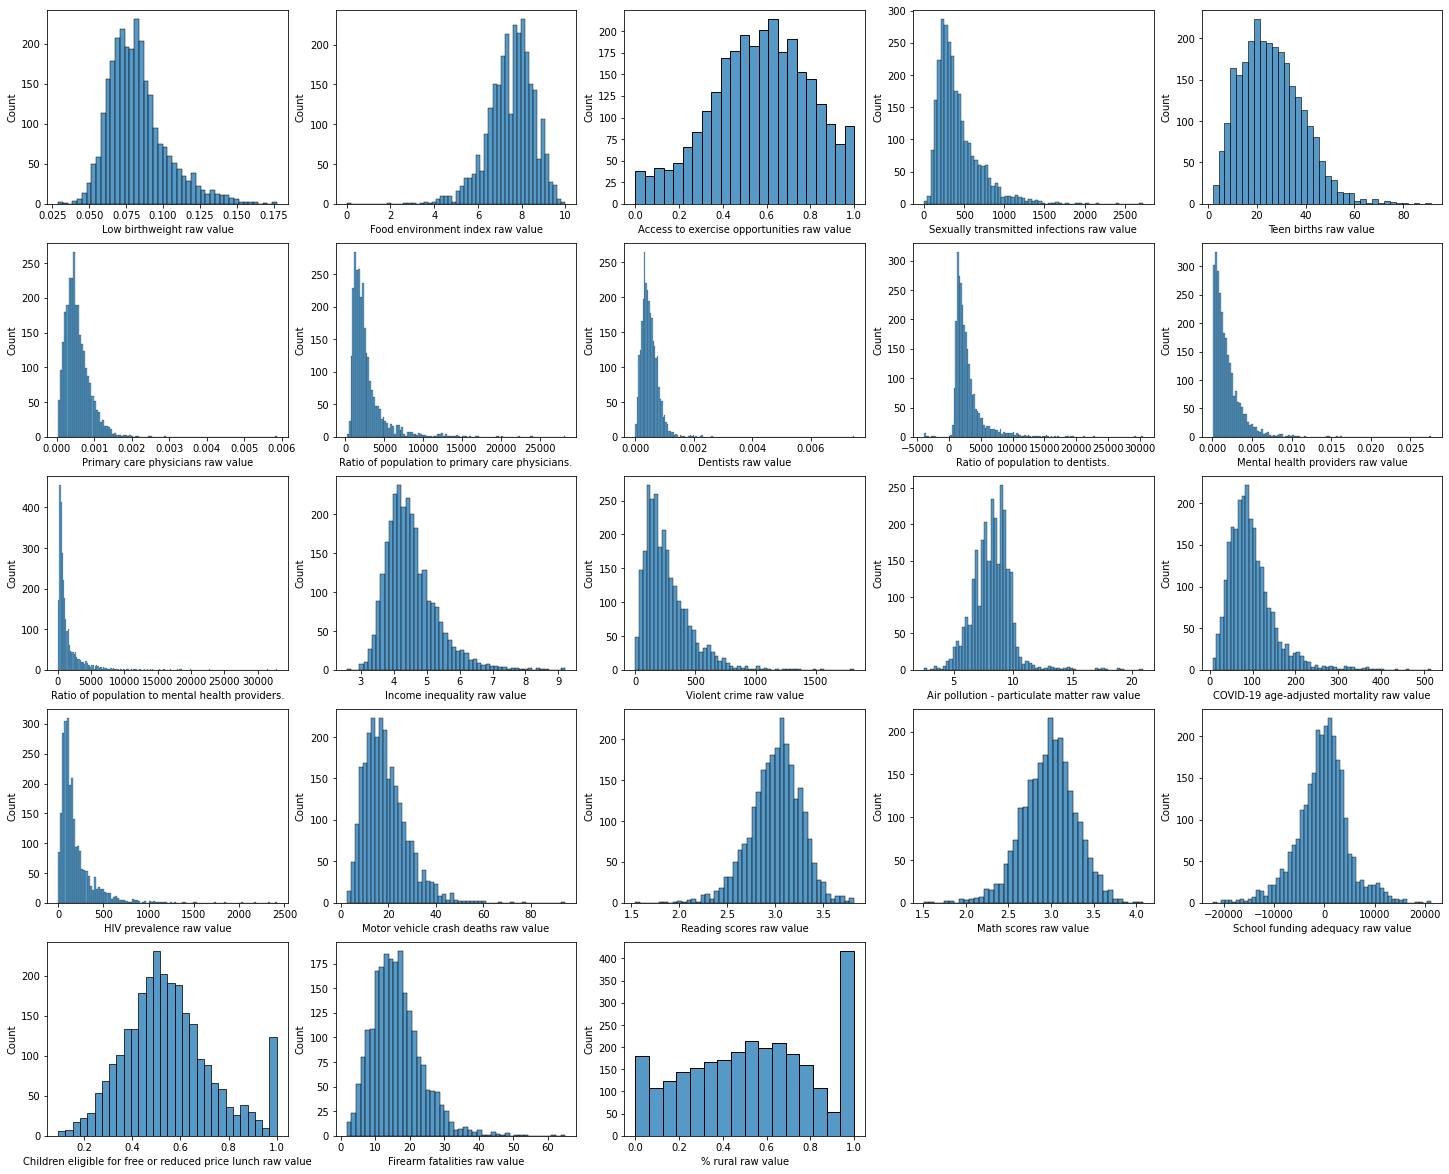

In [21]:
#to check the distribution and to find the best way of imputing the columns, we want to look at the distribution
#as in normal distributions we can take random values based on it's mean and standard deviation to impute
f = plt.figure(figsize=(25, 25))
f.tight_layout()
for i, column in enumerate(missing_list, 1):
    plt.subplot(6,5,i)
    # plt.title(variable_mapping[column])
    plt.xlabel(variable_mapping[column])
    sns.histplot(data[column])

# After looking at distributions of columns with missing values, we decided onto taking a random value from the non-null values of column in order to impute the missing values in order to maintain the distribution, refraining from disturbing the current distribution of columns

In [22]:
#almost all the variables form a normal distribution and therefore we apply imputation based on the same
for col in missing_list:
  # compute mean and std of columns with missing values
    col_mean = data[col].mean()
    col_std = data[col].std()

    # number of NaN in column
    num_na = data[col].isna().sum()

    # generate `num_na` random samples from distribution
    rand_vals = col_mean + col_std * np.random.randn(num_na)

    # replace missing values with the randomly generated values
    data.loc[data[col].isna(), col] = rand_vals

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


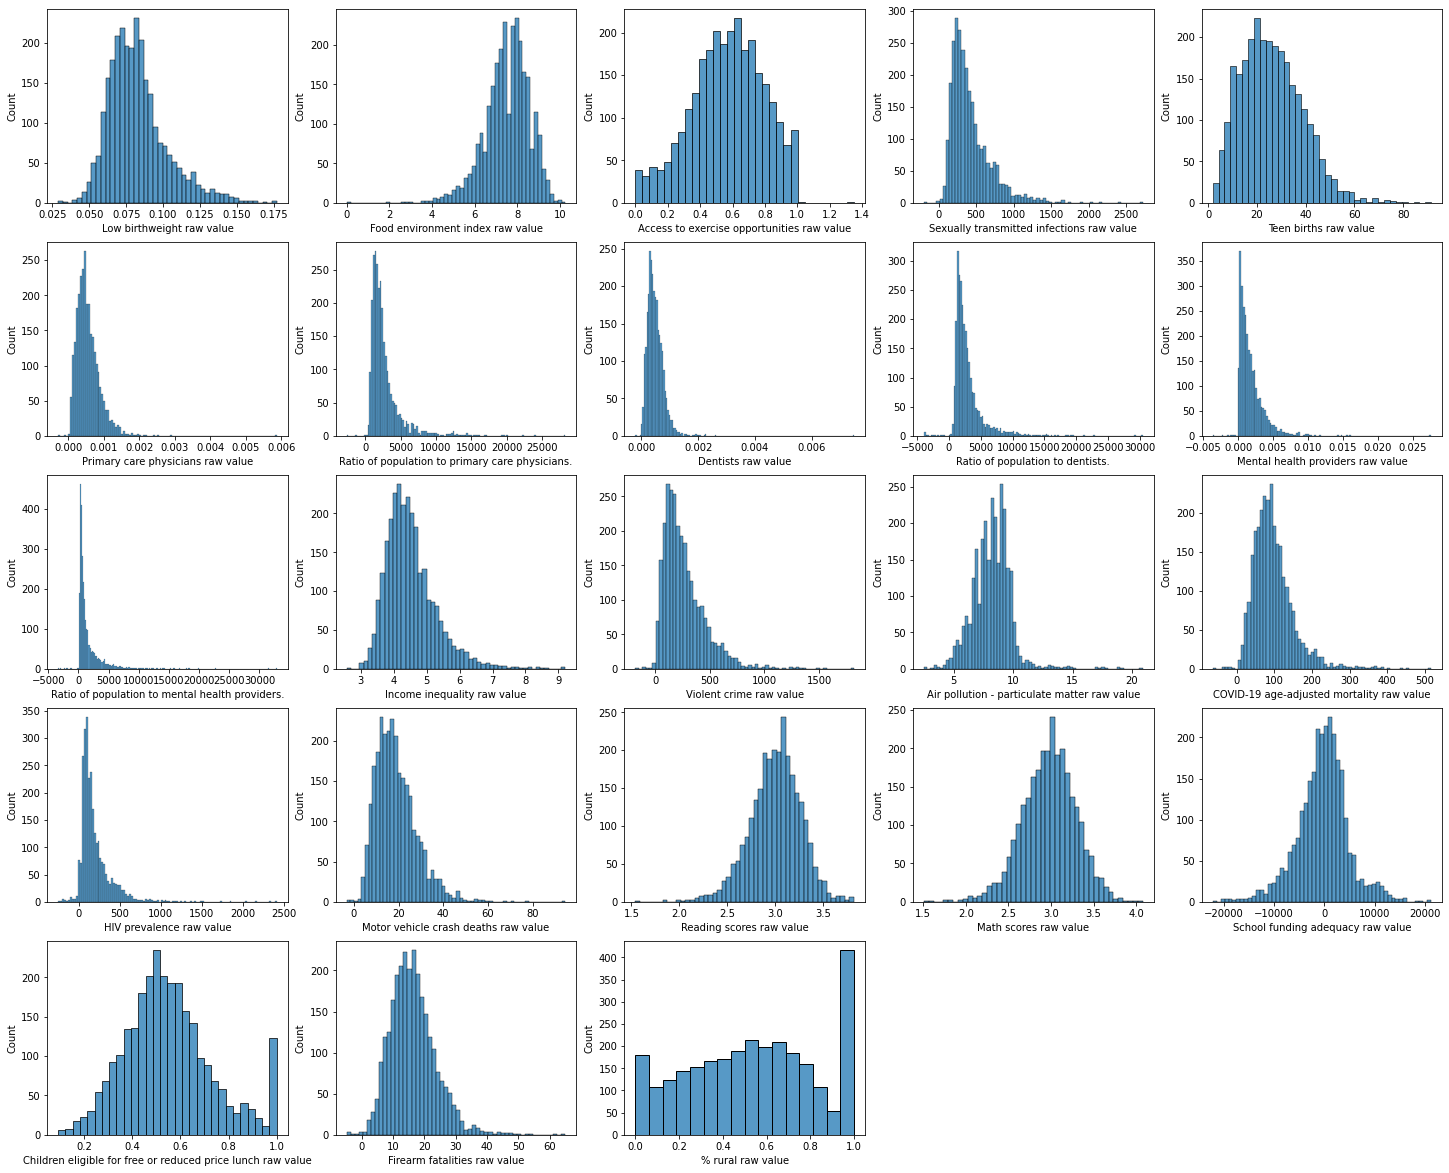

In [23]:
#checking distribution after imputing
f = plt.figure(figsize=(25, 25))
f.tight_layout()
for i, column in enumerate(missing_list, 1):
    plt.subplot(6,5,i)
    # plt.title(variable_mapping[column])
    plt.xlabel(variable_mapping[column])
    sns.histplot(data[column])

In [24]:
#last check for null values, none found! So we are good :)
data.isnull().sum().sort_values(ascending=False)

0
statecode            0
v060_rawvalue        0
v024_rawvalue        0
v044_rawvalue        0
v082_rawvalue        0
v043_rawvalue        0
v135_rawvalue        0
v125_rawvalue        0
v067_rawvalue        0
v137_rawvalue        0
v173_rawvalue        0
v147_rawvalue        0
v127_rawvalue        0
v144_rawvalue        0
v145_rawvalue        0
v061_rawvalue        0
countycode           0
v139_rawvalue        0
v039_rawvalue        0
v143_rawvalue        0
v003_rawvalue        0
v159_rawvalue        0
v160_rawvalue        0
v169_rawvalue        0
v063_rawvalue        0
v065_rawvalue        0
v171_rawvalue        0
v148_rawvalue        0
v166_rawvalue        0
v053_rawvalue        0
v023_rawvalue        0
v069_rawvalue        0
v168_rawvalue        0
v155_rawvalue        0
fipscode             0
state                0
county               0
year                 0
county_ranked        0
v001_rawvalue        0
v002_rawvalue        0
v036_rawvalue        0
v042_rawvalue        0
v037_rawv

In [25]:
#Renaming columns based on variable_mapping created earlier in order to look at our data with context
data.rename(columns = variable_mapping, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
#Dropping these columns as it is not helping in analysis, we have already taken county information
data.drop(['State FIPS Code',	'County FIPS Code',	'5-digit FIPS Code', 'Release Year',	'County Ranked (Yes=1/No=0)'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#This is our final data!

In [27]:
data

,State Abbreviation,Name,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,...,Reading scores raw value,Math scores raw value,School funding adequacy raw value,Median household income raw value,Children eligible for free or reduced price lunch raw value,Childcare cost burden raw value,Firearm fatalities raw value,Broadband access raw value,% 65 and older raw value,% rural raw value
3,AL,Autauga County,8027.394727,0.201,4.510042,5.419068,0.097382,0.197,0.353,6.5,...,3.126968,2.917280,-2618.608000,67565.0,0.454825,0.175268,17.592044,0.827079,0.161760,0.420022
4,AL,Baldwin County,8118.358206,0.172,4.168866,5.173915,0.083857,0.199,0.296,7.4,...,3.192381,3.037912,333.942400,71135.0,0.461323,0.171167,14.014403,0.850691,0.215821,0.422791
5,AL,Barbour County,12876.760319,0.311,5.884415,6.109899,0.119147,0.278,0.404,5.7,...,2.389161,2.008629,-15097.365000,38866.0,0.602062,0.243169,25.520173,0.646321,0.202611,0.677896
6,AL,Bibb County,11191.474323,0.250,5.161337,5.846096,0.100331,0.252,0.412,7.6,...,2.688775,2.563367,-4279.571000,50907.0,0.591428,0.214057,17.818801,0.761262,0.170763,0.683526
7,AL,Blount County,10787.014541,0.232,4.948393,5.738238,0.078599,0.222,0.387,7.8,...,2.901714,2.781497,-574.207000,55203.0,0.524013,0.218557,20.396734,0.796227,0.190034,0.899515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,WY,Sweetwater County,8419.275418,0.163,3.495993,3.933550,0.101337,0.170,0.335,8.1,...,3.253744,3.416824,8355.925500,70583.0,0.341530,0.266056,25.027113,0.866527,0.137417,0.109163
3191,WY,Teton County,3283.066198,0.116,2.779692,3.305173,0.080655,0.113,0.222,8.7,...,3.538906,3.606338,12020.380000,92488.0,0.174277,0.203043,9.442222,0.890795,0.165979,0.464309
3192,WY,Uinta County,9358.208153,0.172,3.792121,4.268578,0.095438,0.188,0.298,8.3,...,3.143786,3.346237,9644.015333,71246.0,0.272685,0.222483,22.547251,0.914495,0.156567,0.430959
3193,WY,Washakie County,7073.941804,0.173,3.660729,4.040619,0.067114,0.176,0.289,8.3,...,3.658461,3.750633,13269.548500,58532.0,0.408193,0.320833,28.984428,0.827757,0.232861,0.359545


#EDA 

# Here, in order to understand the correlation between the columns and our target class we have built the scatterplots with each column


In [28]:
#rounding off correlation values for further analysis
correlation = data.corr()
round(correlation,2)

,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,...,Reading scores raw value,Math scores raw value,School funding adequacy raw value,Median household income raw value,Children eligible for free or reduced price lunch raw value,Childcare cost burden raw value,Firearm fatalities raw value,Broadband access raw value,% 65 and older raw value,% rural raw value
0,,,,,,,,,,,,,,,,,,,,,
Premature death raw value,1.00,0.72,0.73,0.67,0.60,0.69,0.60,-0.63,0.69,-0.37,...,-0.39,-0.38,-0.55,-0.68,0.67,0.23,0.53,-0.64,0.08,0.28
Poor or fair health raw value,0.72,1.00,0.90,0.74,0.59,0.69,0.70,-0.71,0.87,-0.38,...,-0.48,-0.40,-0.68,-0.70,0.77,0.19,0.39,-0.69,-0.08,0.23
Poor physical health days raw value,0.73,0.90,1.00,0.92,0.52,0.83,0.62,-0.67,0.77,-0.42,...,-0.39,-0.39,-0.55,-0.73,0.66,0.26,0.40,-0.66,0.04,0.33
Poor mental health days raw value,0.67,0.74,0.92,1.00,0.50,0.85,0.56,-0.57,0.67,-0.43,...,-0.25,-0.31,-0.44,-0.66,0.52,0.23,0.35,-0.58,0.13,0.38
Low birthweight raw value,0.60,0.59,0.52,0.50,1.00,0.41,0.42,-0.46,0.54,-0.14,...,-0.34,-0.34,-0.61,-0.44,0.60,0.16,0.38,-0.44,-0.07,0.02
Adult smoking raw value,0.69,0.69,0.83,0.85,0.41,1.00,0.67,-0.52,0.73,-0.52,...,-0.22,-0.22,-0.39,-0.73,0.49,0.22,0.36,-0.65,0.17,0.51
Adult obesity raw value,0.60,0.70,0.62,0.56,0.42,0.67,1.00,-0.53,0.78,-0.45,...,-0.37,-0.26,-0.52,-0.65,0.56,0.11,0.31,-0.60,-0.05,0.31
Food environment index raw value,-0.63,-0.71,-0.67,-0.57,-0.46,-0.52,-0.53,1.00,-0.63,0.31,...,0.33,0.29,0.57,0.66,-0.61,-0.20,-0.38,0.56,-0.05,-0.13
Physical inactivity raw value,0.69,0.87,0.77,0.67,0.54,0.73,0.78,-0.63,1.00,-0.45,...,-0.37,-0.29,-0.60,-0.70,0.68,0.06,0.38,-0.68,-0.07,0.31


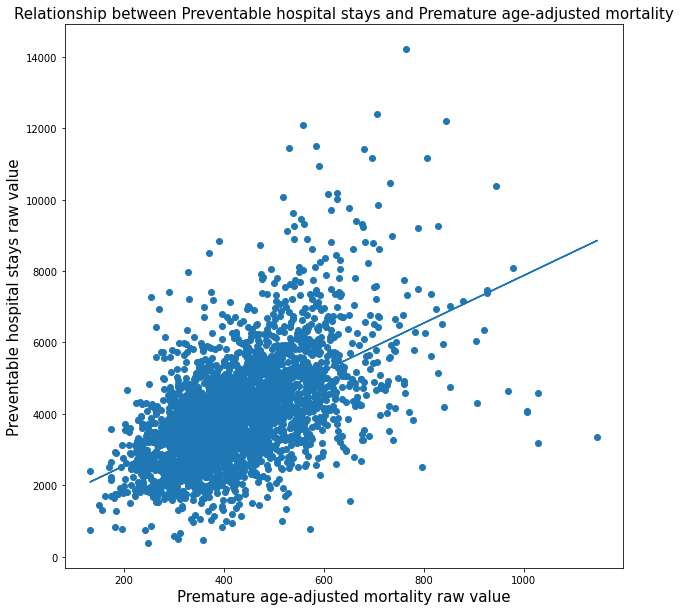

In [29]:
plt.figure(figsize=(10, 10))
plt.scatter(data['Premature age-adjusted mortality raw value'], data['Preventable hospital stays raw value'])
plt.xlabel('Premature age-adjusted mortality raw value', fontsize = 15)
plt.ylabel('Preventable hospital stays raw value', fontsize = 15)
plt.title("Relationship between Preventable hospital stays and Premature age-adjusted mortality", fontsize = 15)
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(data['Premature age-adjusted mortality raw value'], data['Preventable hospital stays raw value'], 1)

#add linear regression line to scatterplot 
plt.plot(data['Premature age-adjusted mortality raw value'], m*data['Premature age-adjusted mortality raw value']+b)

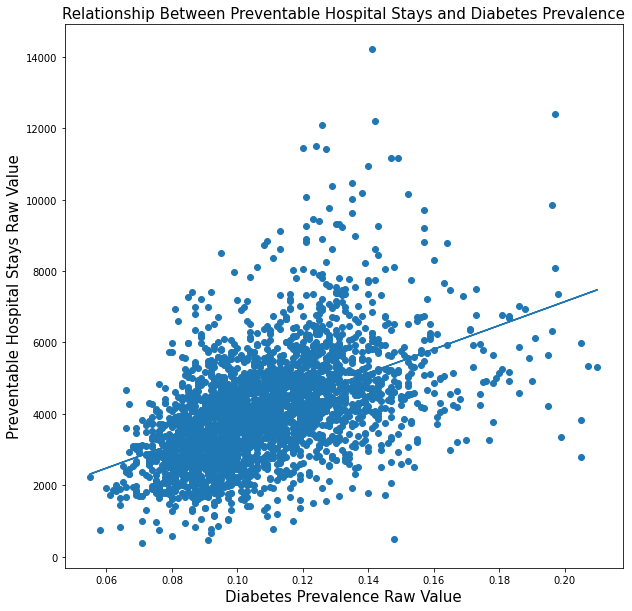

In [30]:
plt.figure(figsize=(10, 10))
plt.scatter(data['Diabetes prevalence raw value'], data['Preventable hospital stays raw value'], )
plt.xlabel('Diabetes Prevalence Raw Value', fontsize = 15)
plt.ylabel('Preventable Hospital Stays Raw Value', fontsize = 15)
plt.title("Relationship Between Preventable Hospital Stays and Diabetes Prevalence", fontsize = 15)
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(data['Diabetes prevalence raw value'], data['Preventable hospital stays raw value'], 1)

#add linear regression line to scatterplot 
plt.plot(data['Diabetes prevalence raw value'], m*data['Diabetes prevalence raw value']+b)

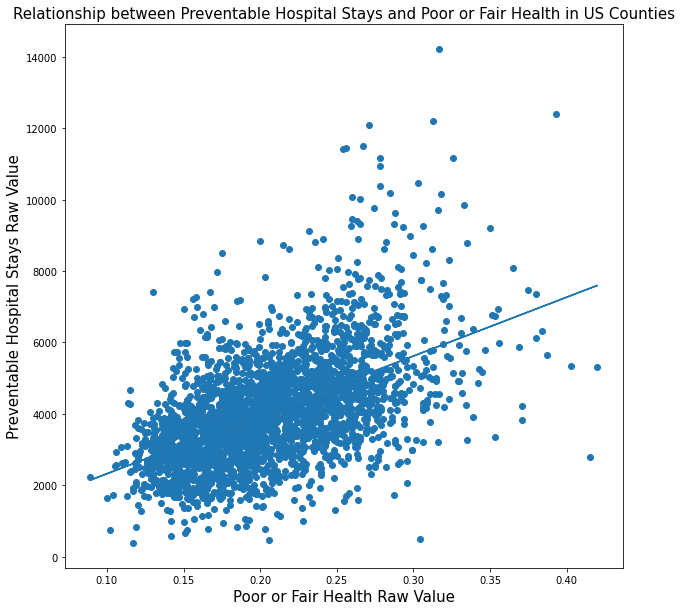

In [31]:
plt.figure(figsize=(10, 10))
plt.scatter(data['Poor or fair health raw value'], data['Preventable hospital stays raw value'])
plt.xlabel('Poor or Fair Health Raw Value', fontsize = 15)
plt.ylabel('Preventable Hospital Stays Raw Value', fontsize = 15)
plt.title("Relationship between Preventable Hospital Stays and Poor or Fair Health in US Counties", fontsize = 15)
m, b = np.polyfit(data['Poor or fair health raw value'], data['Preventable hospital stays raw value'], 1)

#add linear regression line to scatterplot 
plt.plot(data['Poor or fair health raw value'], m*data['Poor or fair health raw value']+b)

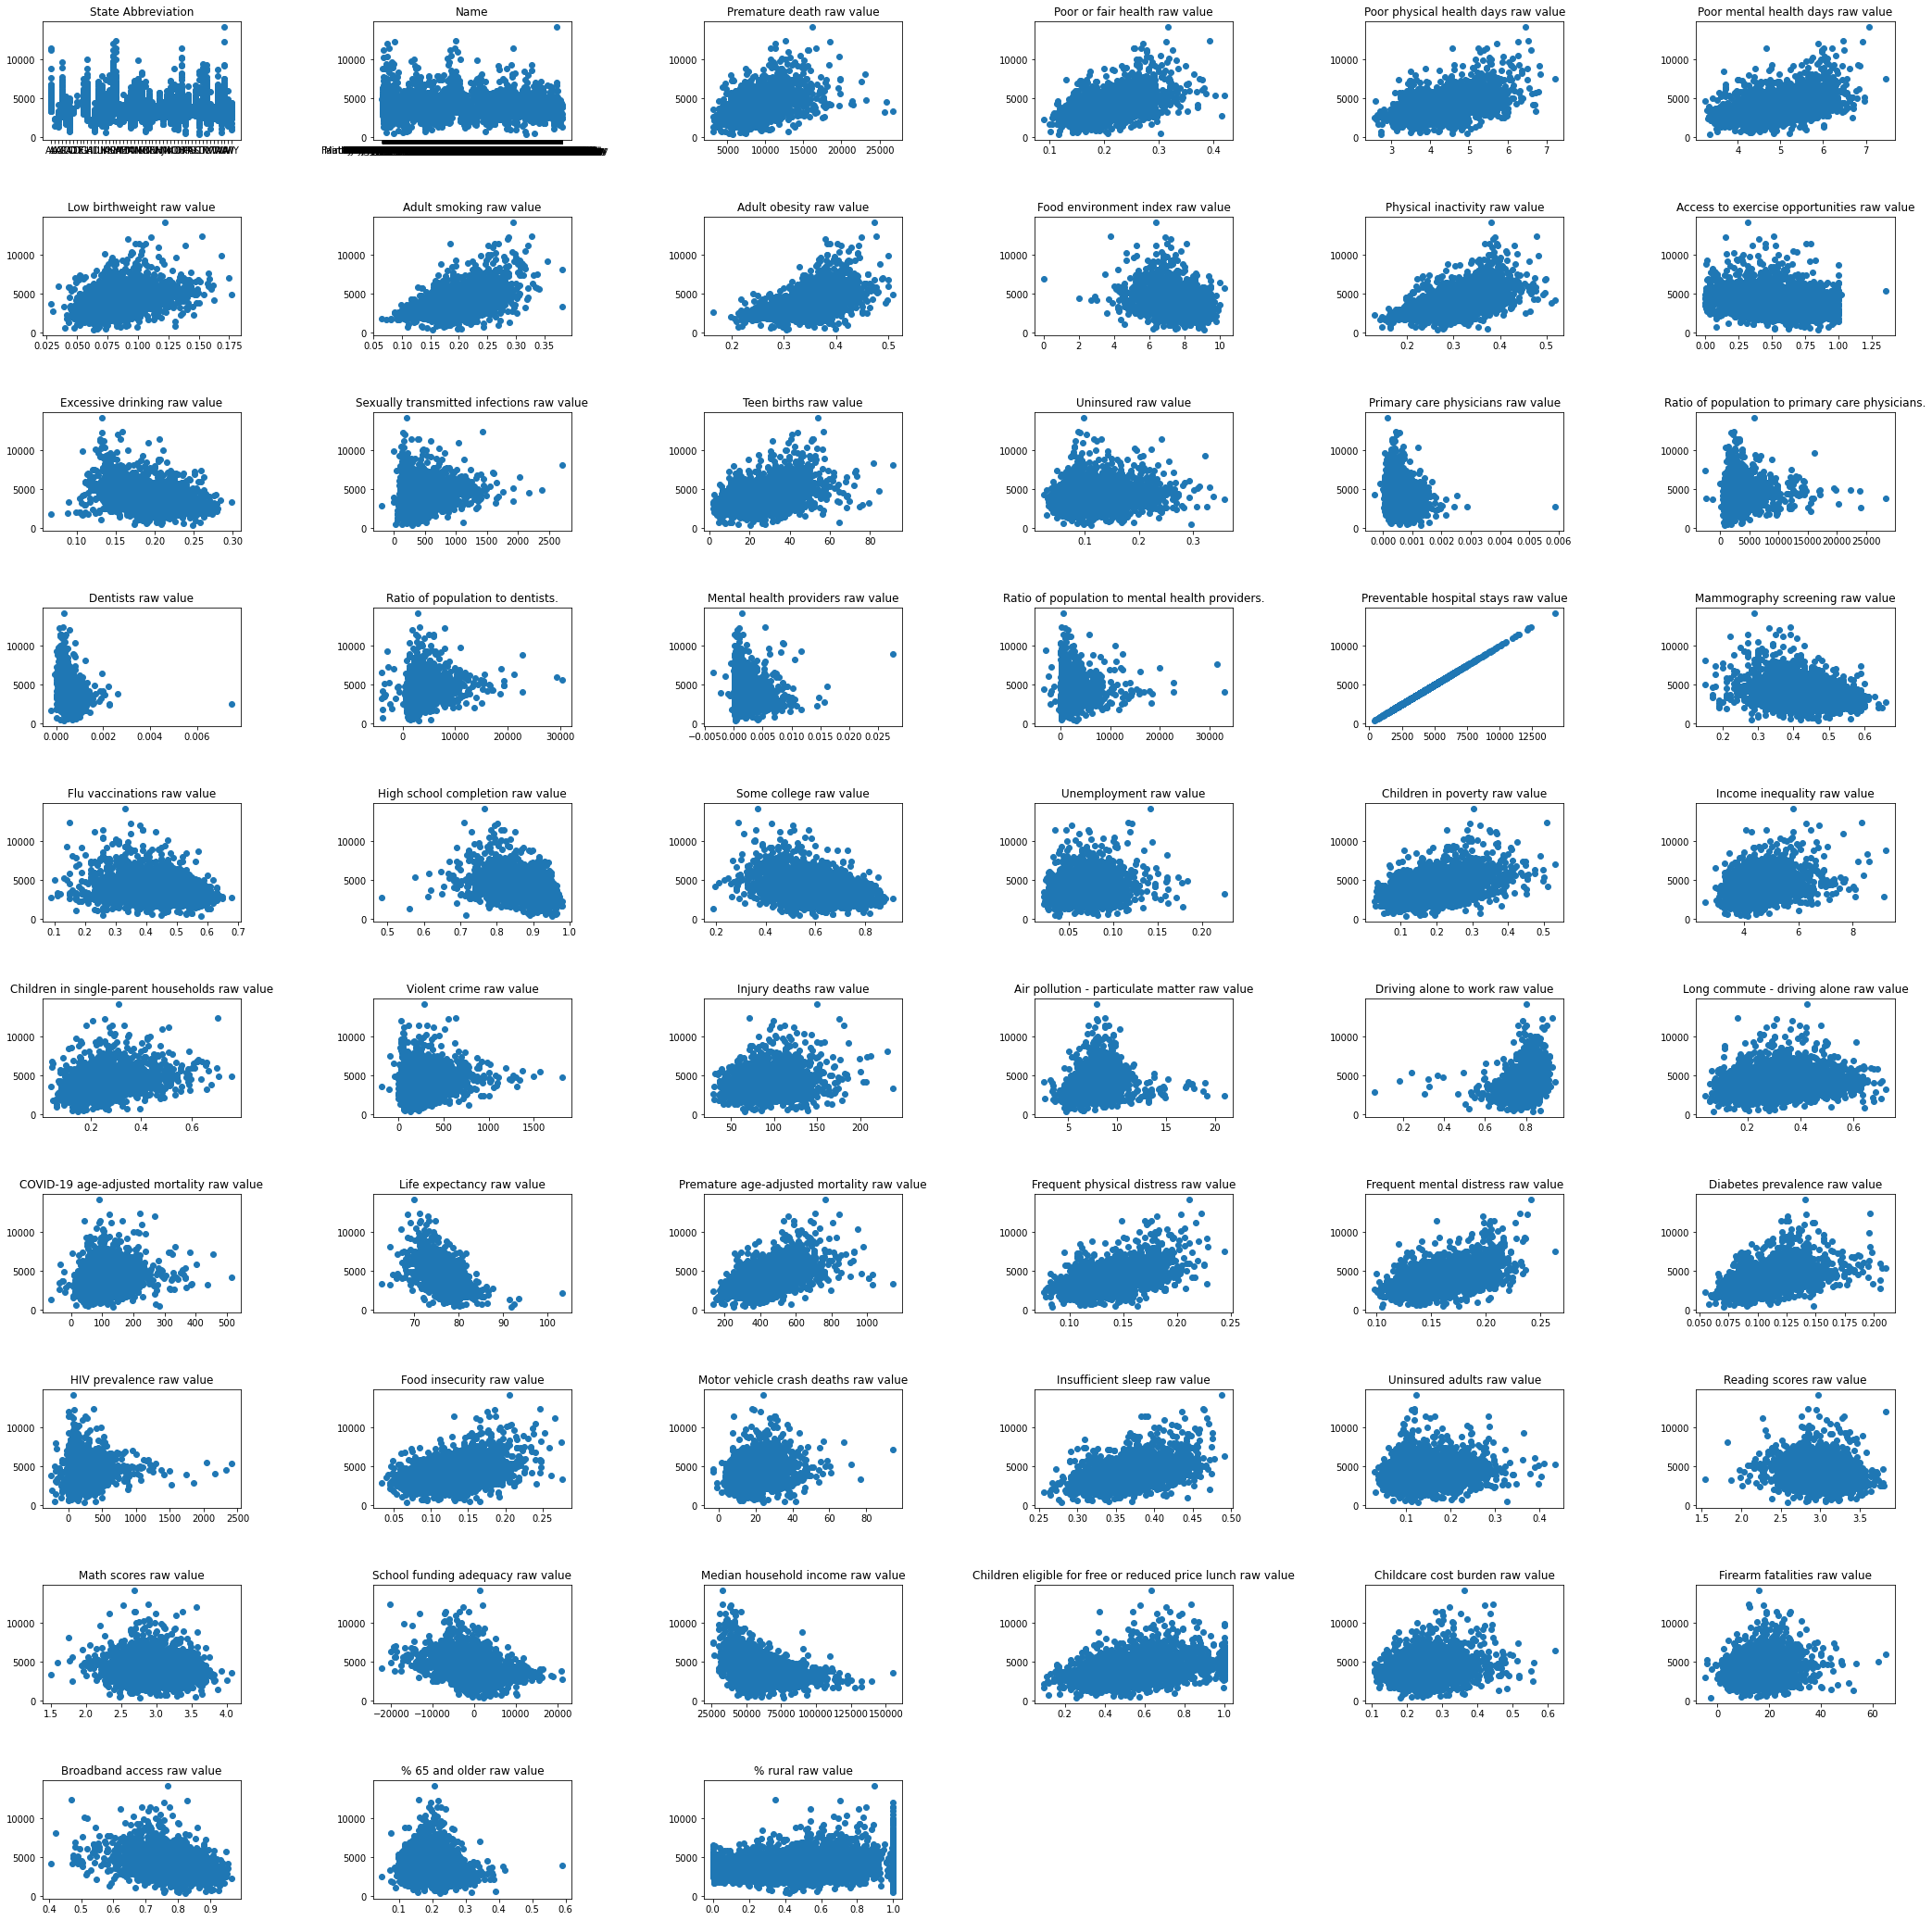

In [32]:
#plotting correlation scatter plots of all the remaining columns
f = plt.figure(figsize=(30, 30))
l1 = ['']+list(data.columns)
len(l1)
for i, column in enumerate(data.columns, 1):
    plt.subplot(10,6,i)
    plt.title(l1[i])
    plt.scatter(x=data[column], y=data['Preventable hospital stays raw value'], )
    
f.tight_layout(pad=5.0)
plt.show()

#In order to further look at the feature relevance, we decided onto build a model which highlights the columns with greater cofficient with the target variable (i.e. better predicts it)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
data

,State Abbreviation,Name,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,...,Reading scores raw value,Math scores raw value,School funding adequacy raw value,Median household income raw value,Children eligible for free or reduced price lunch raw value,Childcare cost burden raw value,Firearm fatalities raw value,Broadband access raw value,% 65 and older raw value,% rural raw value
3,AL,Autauga County,8027.394727,0.201,4.510042,5.419068,0.097382,0.197,0.353,6.5,...,3.126968,2.917280,-2618.608000,67565.0,0.454825,0.175268,17.592044,0.827079,0.161760,0.420022
4,AL,Baldwin County,8118.358206,0.172,4.168866,5.173915,0.083857,0.199,0.296,7.4,...,3.192381,3.037912,333.942400,71135.0,0.461323,0.171167,14.014403,0.850691,0.215821,0.422791
5,AL,Barbour County,12876.760319,0.311,5.884415,6.109899,0.119147,0.278,0.404,5.7,...,2.389161,2.008629,-15097.365000,38866.0,0.602062,0.243169,25.520173,0.646321,0.202611,0.677896
6,AL,Bibb County,11191.474323,0.250,5.161337,5.846096,0.100331,0.252,0.412,7.6,...,2.688775,2.563367,-4279.571000,50907.0,0.591428,0.214057,17.818801,0.761262,0.170763,0.683526
7,AL,Blount County,10787.014541,0.232,4.948393,5.738238,0.078599,0.222,0.387,7.8,...,2.901714,2.781497,-574.207000,55203.0,0.524013,0.218557,20.396734,0.796227,0.190034,0.899515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,WY,Sweetwater County,8419.275418,0.163,3.495993,3.933550,0.101337,0.170,0.335,8.1,...,3.253744,3.416824,8355.925500,70583.0,0.341530,0.266056,25.027113,0.866527,0.137417,0.109163
3191,WY,Teton County,3283.066198,0.116,2.779692,3.305173,0.080655,0.113,0.222,8.7,...,3.538906,3.606338,12020.380000,92488.0,0.174277,0.203043,9.442222,0.890795,0.165979,0.464309
3192,WY,Uinta County,9358.208153,0.172,3.792121,4.268578,0.095438,0.188,0.298,8.3,...,3.143786,3.346237,9644.015333,71246.0,0.272685,0.222483,22.547251,0.914495,0.156567,0.430959
3193,WY,Washakie County,7073.941804,0.173,3.660729,4.040619,0.067114,0.176,0.289,8.3,...,3.658461,3.750633,13269.548500,58532.0,0.408193,0.320833,28.984428,0.827757,0.232861,0.359545


In [35]:
#Separating feature class and target class
to_drop = ['State Abbreviation', 'Name']
data.drop(columns = to_drop, inplace = True)
y = data['Preventable hospital stays raw value']
data.drop(columns = ['Preventable hospital stays raw value'], inplace = True)
X = data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [36]:
X

,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,...,Reading scores raw value,Math scores raw value,School funding adequacy raw value,Median household income raw value,Children eligible for free or reduced price lunch raw value,Childcare cost burden raw value,Firearm fatalities raw value,Broadband access raw value,% 65 and older raw value,% rural raw value
3,8027.394727,0.201,4.510042,5.419068,0.097382,0.197,0.353,6.5,0.322,0.627586,...,3.126968,2.917280,-2618.608000,67565.0,0.454825,0.175268,17.592044,0.827079,0.161760,0.420022
4,8118.358206,0.172,4.168866,5.173915,0.083857,0.199,0.296,7.4,0.276,0.745080,...,3.192381,3.037912,333.942400,71135.0,0.461323,0.171167,14.014403,0.850691,0.215821,0.422791
5,12876.760319,0.311,5.884415,6.109899,0.119147,0.278,0.404,5.7,0.416,0.498379,...,2.389161,2.008629,-15097.365000,38866.0,0.602062,0.243169,25.520173,0.646321,0.202611,0.677896
6,11191.474323,0.250,5.161337,5.846096,0.100331,0.252,0.412,7.6,0.377,0.106044,...,2.688775,2.563367,-4279.571000,50907.0,0.591428,0.214057,17.818801,0.761262,0.170763,0.683526
7,10787.014541,0.232,4.948393,5.738238,0.078599,0.222,0.387,7.8,0.333,0.233767,...,2.901714,2.781497,-574.207000,55203.0,0.524013,0.218557,20.396734,0.796227,0.190034,0.899515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,8419.275418,0.163,3.495993,3.933550,0.101337,0.170,0.335,8.1,0.252,0.830731,...,3.253744,3.416824,8355.925500,70583.0,0.341530,0.266056,25.027113,0.866527,0.137417,0.109163
3191,3283.066198,0.116,2.779692,3.305173,0.080655,0.113,0.222,8.7,0.185,0.964967,...,3.538906,3.606338,12020.380000,92488.0,0.174277,0.203043,9.442222,0.890795,0.165979,0.464309
3192,9358.208153,0.172,3.792121,4.268578,0.095438,0.188,0.298,8.3,0.278,0.788806,...,3.143786,3.346237,9644.015333,71246.0,0.272685,0.222483,22.547251,0.914495,0.156567,0.430959
3193,7073.941804,0.173,3.660729,4.040619,0.067114,0.176,0.289,8.3,0.259,0.762920,...,3.658461,3.750633,13269.548500,58532.0,0.408193,0.320833,28.984428,0.827757,0.232861,0.359545


In [37]:
#splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [38]:
X_test

,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,Low birthweight raw value,Adult smoking raw value,Adult obesity raw value,Food environment index raw value,Physical inactivity raw value,Access to exercise opportunities raw value,...,Reading scores raw value,Math scores raw value,School funding adequacy raw value,Median household income raw value,Children eligible for free or reduced price lunch raw value,Childcare cost burden raw value,Firearm fatalities raw value,Broadband access raw value,% 65 and older raw value,% rural raw value
1792,7273.200791,0.174,3.939237,4.394215,0.081123,0.156,0.302,8.0,0.212,0.878545,...,2.881979,2.780084,-936.065400,75232.0,0.501955,0.241892,16.362191,0.871655,0.172503,0.042669
1252,6245.365658,0.136,3.459224,4.556499,0.070171,0.161,0.271,9.2,0.248,0.799998,...,3.321382,3.134792,8654.046071,88420.0,0.895870,0.336847,3.472518,0.896352,0.192226,0.103077
1628,22566.773716,0.250,5.746808,5.797313,0.086779,0.274,0.388,5.4,0.295,0.482705,...,3.080013,2.060240,-3005.990000,42823.0,0.947184,0.382598,28.604550,0.732468,0.139095,0.719083
1055,10535.826440,0.275,5.746027,5.933631,0.085116,0.287,0.406,6.4,0.384,0.419405,...,3.166565,3.024415,67.839840,42297.0,0.628844,0.292456,22.766942,0.705527,0.184894,0.735804
611,7529.804708,0.166,3.855921,4.716252,0.079851,0.192,0.332,8.4,0.255,0.739952,...,2.761914,2.730460,1900.983120,57434.0,0.515882,0.235731,10.951536,0.807346,0.210179,0.325991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,9670.595657,0.279,4.877160,4.943775,0.093056,0.228,0.390,7.2,0.353,0.169421,...,2.755223,2.659874,-4943.350000,49755.0,0.993480,0.268496,8.831552,0.711853,0.199272,0.864644
2395,9479.685870,0.194,4.367881,4.885025,0.085215,0.202,0.316,7.3,0.279,0.542862,...,2.850025,2.799794,-940.814500,58061.0,0.566179,0.159711,18.132598,0.782891,0.241680,0.649213
1086,12257.539083,0.331,6.541125,6.221837,0.104938,0.329,0.428,6.4,0.441,1.000000,...,3.104795,3.024694,-4332.645000,31453.0,0.787140,0.469907,13.843066,0.609989,0.166423,1.000000
748,7515.990924,0.190,4.248032,5.067415,0.087611,0.216,0.363,7.6,0.313,0.598104,...,3.193403,3.101055,2403.801000,59252.0,0.473963,0.181091,9.346205,0.788032,0.180437,0.509563


In [39]:
#standardizing the data (bring to the same scale)
# apply scaling
scaler = StandardScaler()
# fit on training dataset only 
scaler.fit(X_train) 
# transform training dataset
X_train = scaler.transform(X_train)
# transform testing dataset 
X_test = scaler.transform(X_test) 

In [68]:
#running lasso and e_net models with different alpha values and using GridSearchCV to tune the hyperparameters
#in order to get the best model and it configuration based on R2 and RMSE values
params = {'alpha': [22,20, 18, 16, 15,14,12,10, 5, 1, 0.1, 0.01, 0.001]}
lasso = Lasso()
e_net = ElasticNet()
ridge = Ridge()


for model in [ lasso, e_net, ridge]:
    cv = GridSearchCV(model, params, cv = 5, scoring = ['neg_mean_squared_error', 'r2'], refit = 'neg_mean_squared_error')
    cv.fit(X_train, y_train)
    
    RMSE = (-cv.best_score_.mean())**(1/2)
    print('model: ', model) 
    print('cross-validated mean RMSE: {:.3f}'.format(RMSE))
    mean_R2 = cv.cv_results_['mean_test_r2'].mean()
    print('cross-validated mean R2: {:.3f}'.format(mean_R2))
    print('best model parameter: ', cv.best_estimator_, '\n')

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.572e+08, tolerance: 3.735e+05
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.080e+08, tolerance: 3.555e+05
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.820e+08, tolerance: 3.617e+05
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.753e+08, tolerance: 3.400e+05
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.728e+08, tolerance: 3.785e+05
Objective did n

model:  Lasso()
cross-validated mean RMSE: 1191.177
cross-validated mean R2: 0.381
best model parameter:  Lasso(alpha=1) 



Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.009e+06, tolerance: 3.735e+05
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.115e+06, tolerance: 3.555e+05
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.082e+06, tolerance: 3.617e+05
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.174e+06, tolerance: 3.400e+05
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.739e+06, tolerance: 3.785e+05
Objective did n

model:  ElasticNet()
cross-validated mean RMSE: 1191.409
cross-validated mean R2: 0.324
best model parameter:  ElasticNet(alpha=0.01) 

model:  Ridge()
cross-validated mean RMSE: 1191.417
cross-validated mean R2: 0.385
best model parameter:  Ridge(alpha=10) 



In [69]:
#Selecting the best model and evaluating it on our test dataset 
enet = ElasticNet(alpha=0.01)
enet.fit(X_train, y_train)
y_pred = enet.predict(X_test)
print("Model performance of Elasticnet on test")
print('Test R2: {:.3f}'.format(r2_score(y_test, y_pred)))
print('Test RMSE: {:.3f}'.format((mean_squared_error(y_test, y_pred))**(1/2)))

Model performance of Elasticnet on test
Test R2: 0.485
Test RMSE: 1076.801


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.135e+09, tolerance: 4.524e+05


In [70]:
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print("Model performance of Lasso on test")
print('Test R2: {:.3f}'.format(r2_score(y_test, y_pred)))
print('Test RMSE: {:.3f}'.format((mean_squared_error(y_test, y_pred))**(1/2)))

Model performance of Lasso on test
Test R2: 0.484
Test RMSE: 1078.023


In [71]:
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print("Model performance of Ridge on test")
print('Test R2: {:.3f}'.format(r2_score(y_test, y_pred)))
print('Test RMSE: {:.3f}'.format((mean_squared_error(y_test, y_pred))**(1/2)))

Model performance of Ridge on test
Test R2: 0.485
Test RMSE: 1076.801


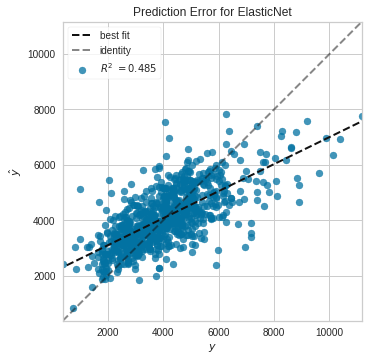

In [72]:
#we can see from this that the best fit and the predictor are somewhat similar and are good predictions
from yellowbrick.regressor import prediction_error 

visualizer = prediction_error(enet, X_train, y_train, X_test, y_test)

In [43]:
#feature selection based on the coefficient(weight) values in the trained model
importance = np.abs(enet.coef_)

features = X.columns

feat_importance = pd.DataFrame([features, importance]).transpose()
feat_importance.rename(columns = {0: 'feature', 1: 'coefficient'}, inplace=True)
feat_importance.sort_values(by = 'coefficient', ascending = False)

,feature,coefficient
35,Premature age-adjusted mortality raw value,579.868537
1,Poor or fair health raw value,579.561185
38,Diabetes prevalence raw value,363.262998
2,Poor physical health days raw value,342.585874
0,Premature death raw value,285.480733
8,Physical inactivity raw value,280.160172
23,Some college raw value,204.790318
42,Insufficient sleep raw value,202.975814
5,Adult smoking raw value,198.879604
7,Food environment index raw value,170.207071


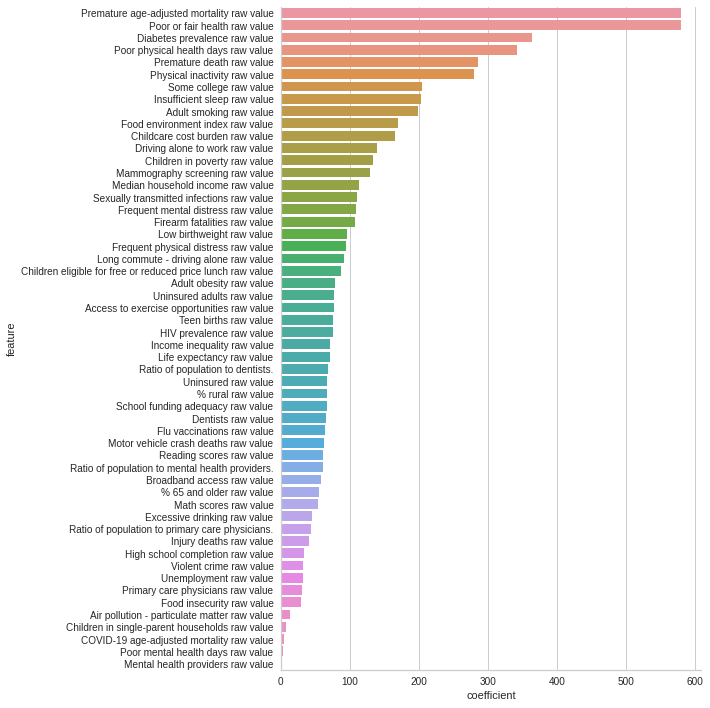

In [88]:
sns.catplot(y='feature', x = 'coefficient', data =feat_importance.sort_values(by='coefficient', ascending=False), kind = 'bar', height = 10)

# Thus the top three factors that are contributing to the preventable hospitalizations are -


*  Premature age-adjusted mortality
*  Poor or fair health
*  Diabetes prevalence

#Let's also try to find a relationship within these variables - 


*   These variables within themselves too are correlated therefore focussing on an overall picture in terms of eating habits and lifestyle can have an signigicant impact on preventable hospitalization 





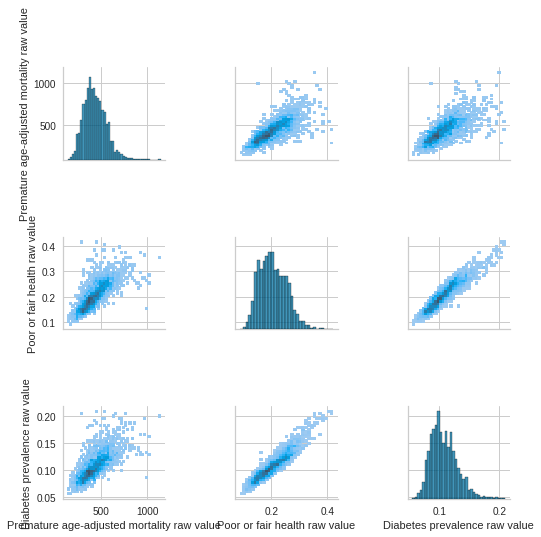

In [86]:
sns.pairplot(data[['Premature age-adjusted mortality raw value', 'Poor or fair health raw value', 'Diabetes prevalence raw value']], kind = 'hist')

In [45]:
!pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.5 MB/s 


#To verify further, we used Boruta feature selection algorthm to shortlist important features

In [46]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
import numpy as np


In [49]:
#initialize Boruta
forest = RandomForestRegressor(
   n_jobs = -1, 
   max_depth = 5
)
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 100 # number of trials to perform
)
## fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(X), np.array(y))
## print results
green_area = X.columns[boruta.support_].to_list()
blue_area = X.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

features in the green area: ['Poor or fair health raw value', 'Poor physical health days raw value', 'Poor mental health days raw value', 'Adult smoking raw value', 'Adult obesity raw value', 'Physical inactivity raw value', 'Sexually transmitted infections raw value', 'Teen births raw value', 'Ratio of population to mental health providers.', 'Unemployment raw value', 'Air pollution - particulate matter raw value', 'Driving alone to work raw value', 'Life expectancy raw value', 'Premature age-adjusted mortality raw value', 'Frequent physical distress raw value', 'Frequent mental distress raw value', 'Insufficient sleep raw value', 'Median household income raw value', 'Childcare cost burden raw value', '% 65 and older raw value']
features in the blue area: ['Ratio of population to dentists.', 'Flu vaccinations raw value', 'Reading scores raw value']


#Now, we have shortlisted down to 20 features that are prime for our analysis. Let's check partial dependence

In [82]:
green_area = pd.DataFrame(green_area)
green_area

,0
0,Poor or fair health raw value
1,Poor physical health days raw value
2,Poor mental health days raw value
3,Adult smoking raw value
4,Adult obesity raw value
5,Physical inactivity raw value
6,Sexually transmitted infections raw value
7,Teen births raw value
8,Ratio of population to mental health providers.
9,Unemployment raw value


In [51]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.2 MB/s 


In [52]:
X_boruto =  X[green_area] 
X_train_boruto, X_test_boruto, y_train, y_test = train_test_split(X_boruto, y, test_size = 0.3, random_state = 42)

In [53]:
#Selecting the best model and evaluating it on our test dataset 
forest1 = RandomForestRegressor( n_jobs = -1,  max_depth = 5)
forest1.fit(X_train_boruto, y_train)

RandomForestRegressor(max_depth=5, n_jobs=-1)

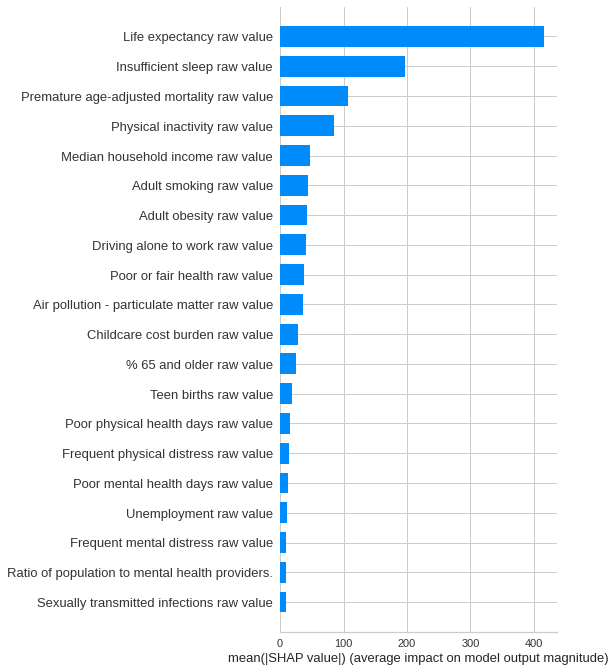

In [54]:
import shap

shap_values = shap.TreeExplainer(forest1).shap_values(X_train_boruto)
shap.summary_plot(shap_values, X_train_boruto, plot_type="bar")